In [1]:
#Making necessary imports
import numpy as np  # linear algebra
import pandas as pd # data processing
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.compose import ColumnTransformer

# Data Importation

In [2]:
# Loading in the Dataset
df =pd.read_csv("DB_R.csv")

# Initial Data Analyis

In [3]:
#Checking head of dataset (first 10)
df.head(n=10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,18.0,0,0,never,24.78,8.2,130,1
1,Female,78.0,0,0,not current,27.32,5.8,126,1
2,Female,80.0,0,0,former,27.47,8.8,126,1
3,Female,72.0,1,0,No Info,27.32,6.5,200,1
4,Male,77.0,0,0,No Info,27.32,5.8,300,1
5,Female,65.0,0,0,never,33.41,6.8,126,1
6,Male,80.0,0,0,No Info,27.32,9.0,220,1
7,Female,41.0,0,0,never,47.26,5.7,155,1
8,Male,57.0,0,0,never,28.34,6.6,130,1
9,Male,79.0,1,0,not current,36.72,6.8,260,1


In [4]:
# Checking size of dataset
df.shape

(6773, 9)

In [5]:
# Checking summary statistics of numerical features
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000
mean,48.978969,0.136867,0.081057,28.985872,6.035317,158.265613,0.407057
std,21.990703,0.343732,0.272943,7.284542,1.258247,54.816325,0.491322
min,0.080000,0.000000,0.000000,10.980000,3.500000,80.000000,0.000000
25%,33.000000,0.000000,0.000000,25.250000,5.700000,126.000000,0.000000
50%,53.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.000000
75%,66.000000,0.000000,0.000000,32.250000,6.600000,160.000000,1.000000
max,80.000000,1.000000,1.000000,88.760000,9.000000,300.000000,1.000000


In [6]:
#basic statistics of the dataset
df.describe

<bound method NDFrame.describe of       gender   age  hypertension  heart_disease smoking_history    bmi  \
0       Male  18.0             0              0           never  24.78   
1     Female  78.0             0              0     not current  27.32   
2     Female  80.0             0              0          former  27.47   
3     Female  72.0             1              0         No Info  27.32   
4       Male  77.0             0              0         No Info  27.32   
...      ...   ...           ...            ...             ...    ...   
6768  Female  80.0             0              0         No Info  27.32   
6769  Female   2.0             0              0         No Info  17.37   
6770    Male  66.0             0              0          former  27.83   
6771  Female  24.0             0              0           never  35.42   
6772  Female  57.0             0              0         current  22.43   

      HbA1c_level  blood_glucose_level  diabetes  
0             8.2         

In [7]:
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease smoking_history    bmi  \
0       Male  18.0             0              0           never  24.78   
1     Female  78.0             0              0     not current  27.32   
2     Female  80.0             0              0          former  27.47   
3     Female  72.0             1              0         No Info  27.32   
4       Male  77.0             0              0         No Info  27.32   
...      ...   ...           ...            ...             ...    ...   
6768  Female  80.0             0              0         No Info  27.32   
6769  Female   2.0             0              0         No Info  17.37   
6770    Male  66.0             0              0          former  27.83   
6771  Female  24.0             0              0           never  35.42   
6772  Female  57.0             0              0         current  22.43   

      HbA1c_level  blood_glucose_level  diabetes  
0             8.2           

In [8]:
#find null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [10]:
df.tail

<bound method NDFrame.tail of       gender   age  hypertension  heart_disease smoking_history    bmi  \
0       Male  18.0             0              0           never  24.78   
1     Female  78.0             0              0     not current  27.32   
2     Female  80.0             0              0          former  27.47   
3     Female  72.0             1              0         No Info  27.32   
4       Male  77.0             0              0         No Info  27.32   
...      ...   ...           ...            ...             ...    ...   
6768  Female  80.0             0              0         No Info  27.32   
6769  Female   2.0             0              0         No Info  17.37   
6770    Male  66.0             0              0          former  27.83   
6771  Female  24.0             0              0           never  35.42   
6772  Female  57.0             0              0         current  22.43   

      HbA1c_level  blood_glucose_level  diabetes  
0             8.2             

In [11]:
#finding unique values in the column
for i in df.columns:
    print("*******************************************************************",i,"************************************************************************")
    print()
    print(set(df[i].tolist()))
    print()

******************************************************************* gender ************************************************************************

{'Male', 'Female'}

******************************************************************* age ************************************************************************

{0.48, 1.72, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 1.24, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 0.72, 1.4, 1.08, 1.0, 0.16, 0.8, 1.8, 1.48, 9.0, 1.16, 0.88, 0.64, 0.4, 1.88, 0.08, 0.56, 1.56, 0.24, 0.32, 1.64, 1.32}

******************************************************************* hypertension ***

In [12]:
#Checking for duplicates in dataset
df.duplicated().sum()

9

In [13]:
df= df.drop_duplicates()

# Confirming Duplicate Removal

In [14]:
df.duplicated().sum()

0

In [15]:
#Checking Value Count of Gender Column
df.gender.value_counts()

gender
Female    3844
Male      2920
Name: count, dtype: int64

In [16]:
#Checking Value Count of Target Column
df.diabetes.value_counts()

diabetes
0    4008
1    2756
Name: count, dtype: int64

In [17]:
#Checking Value Count of Age Column
df.age.value_counts()

age
80.00    559
62.00    154
61.00    151
56.00    130
55.00    130
        ... 
0.40       2
1.32       1
1.56       1
0.08       1
0.16       1
Name: count, Length: 102, dtype: int64

In [18]:
#Checking tail of dataset (last 10)
df.tail(n=10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6762,Female,26.0,0,0,No Info,27.32,5.0,158,0
6763,Male,39.0,0,0,No Info,27.32,6.1,100,0
6764,Male,22.0,0,0,current,29.65,6.0,80,0
6765,Female,26.0,0,0,never,34.34,6.5,160,0
6766,Female,40.0,0,0,never,40.69,3.5,155,0
6767,Female,36.0,0,0,No Info,24.60,4.8,145,0
6769,Female,2.0,0,0,No Info,17.37,6.5,100,0
6770,Male,66.0,0,0,former,27.83,5.7,155,0
6771,Female,24.0,0,0,never,35.42,4.0,100,0
6772,Female,57.0,0,0,current,22.43,6.6,90,0


# Exploratory Data Analysis (EDA)

In [19]:
numeric_col=[]
non_numeric_col=[]
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        if(df[column].nunique()<5):
            non_numeric_col.append(column)
        else:
            numeric_col.append(column)
    else:
        non_numeric_col.append(column)

In [20]:
print(numeric_col)
print(non_numeric_col)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Countplot
    sns.countplot(x=df[col], data=df, palette='Set2', ax=ax[0])  # Changed palette to 'Set2'
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    plt.savefig('plott')
    plt.show()


 Univariate analysis for gender column:


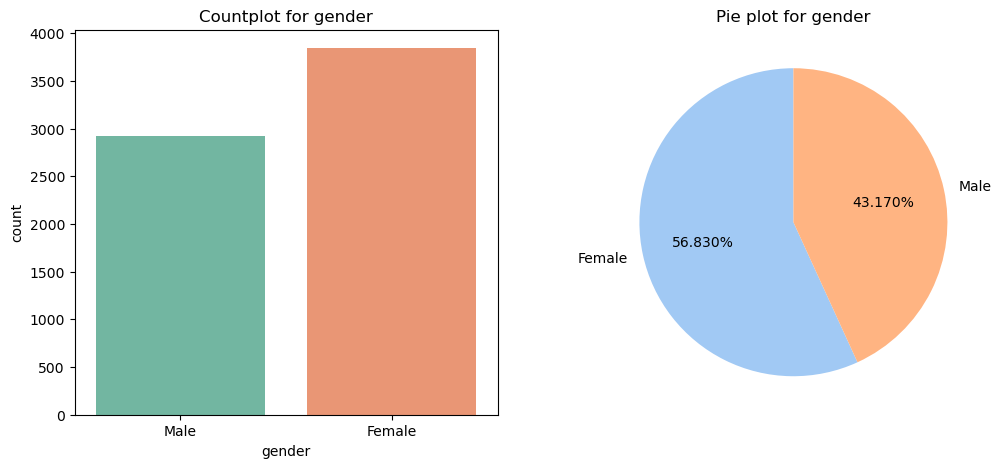

 Univariate analysis for hypertension column:


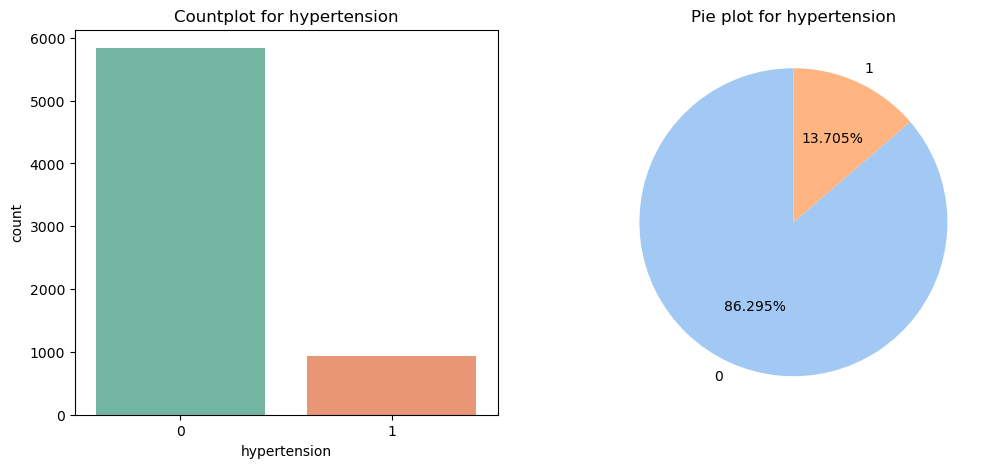

 Univariate analysis for heart_disease column:


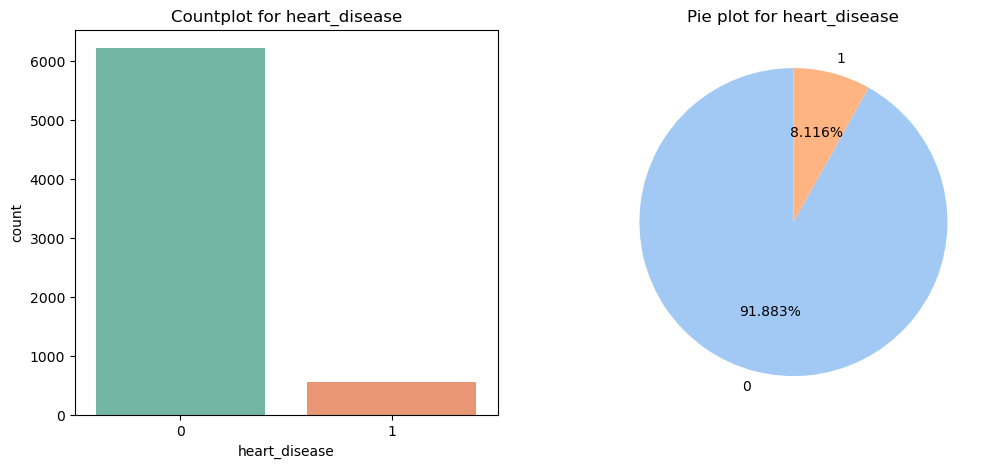

 Univariate analysis for smoking_history column:


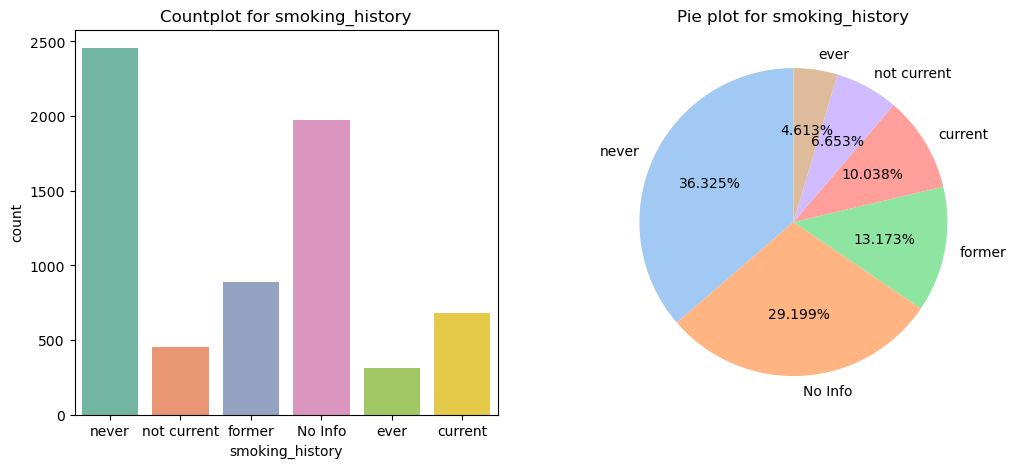

 Univariate analysis for diabetes column:


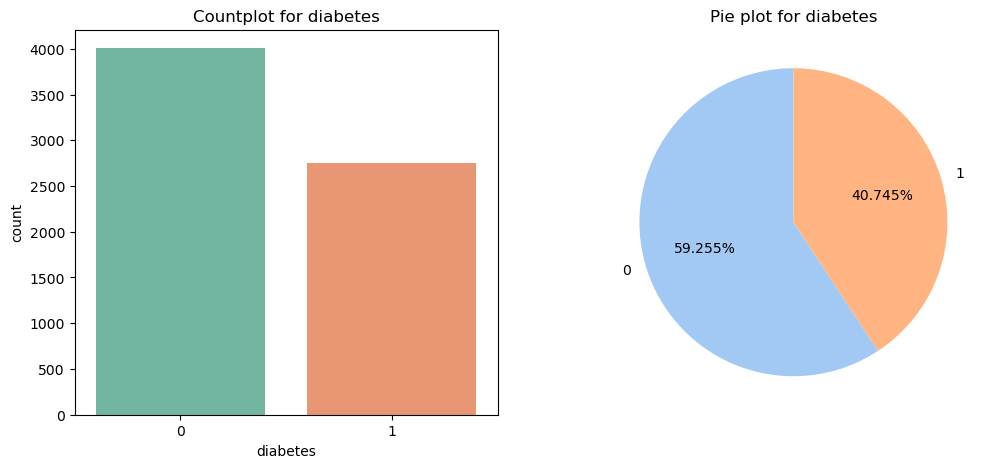

In [22]:
for col in non_numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

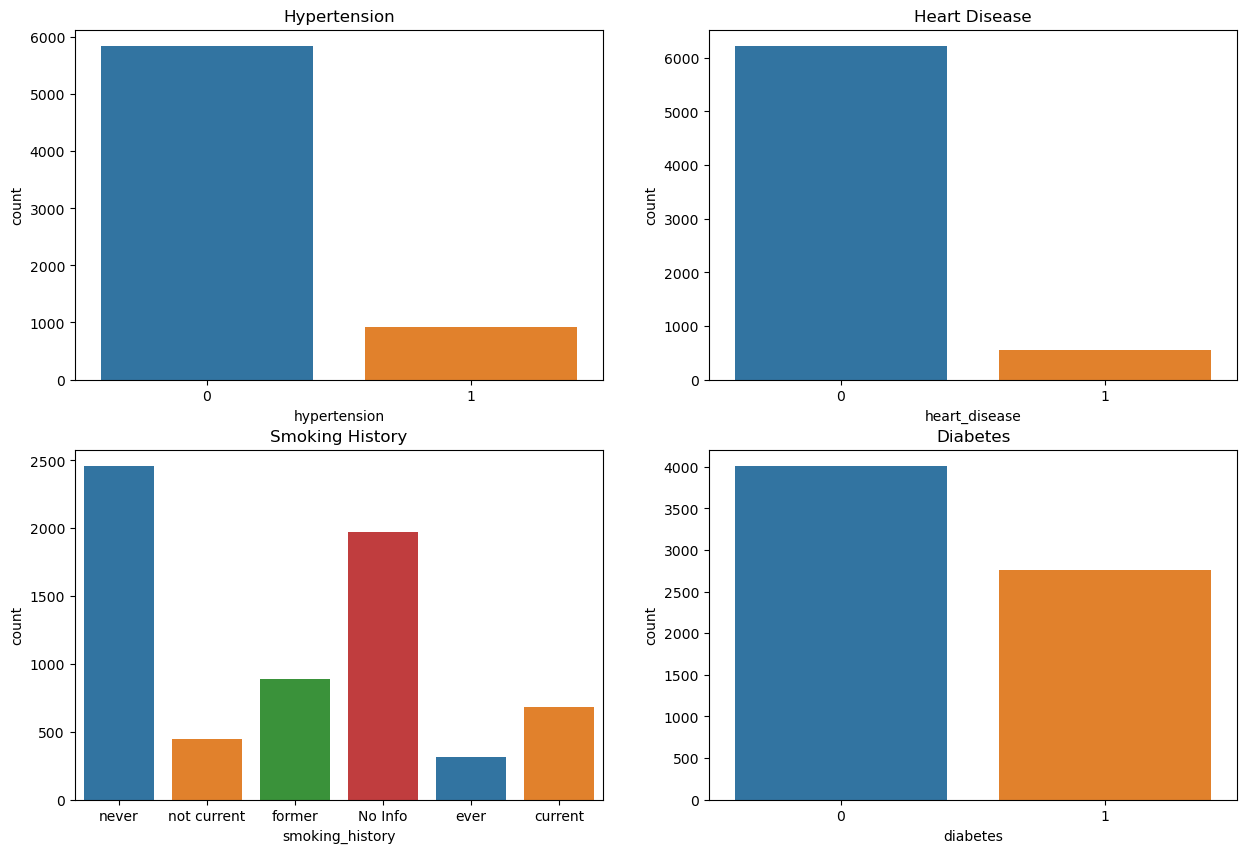

In [23]:

# Define custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot countplots for categorical variables with custom palette
sns.countplot(x="hypertension", data=df, ax=ax[0, 0], palette=custom_palette)
sns.countplot(x="heart_disease", data=df, ax=ax[0, 1], palette=custom_palette)
sns.countplot(x="smoking_history", data=df, ax=ax[1, 0], palette=custom_palette)
sns.countplot(x="diabetes", data=df, ax=ax[1, 1], palette=custom_palette)

# Set titles
ax[0, 0].set_title('Hypertension')
ax[0, 1].set_title('Heart Disease')
ax[1, 0].set_title('Smoking History')
ax[1, 1].set_title('Diabetes')
plt.savefig('data distribution')
plt.show()



# Data Cleaning


In [24]:
# Checking data types before encoding
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical using Label Encoding
for column in categorical_columns:
    le = LabelEncoder()
    df.loc[:, column] = le.fit_transform(df[column])



In [26]:
# Checking data types after encoding
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [27]:
# Checking head of dataset after Encoding
df.head(n=5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,18.0,0,0,4,24.78,8.2,130,1
1,0,78.0,0,0,5,27.32,5.8,126,1
2,0,80.0,0,0,3,27.47,8.8,126,1
3,0,72.0,1,0,0,27.32,6.5,200,1
4,1,77.0,0,0,0,27.32,5.8,300,1


In [28]:
# Checking missing columns in dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Correlation Analysis For Multi-Collinearity


In [29]:
# Correlation Analysis
# Selecting only numerical features (excluding the target variable)
numerical_features = df.select_dtypes(include='number')
# Compute correlation matrix
correlation_matrix = numerical_features.corr()
# Display correlation matrix
print(correlation_matrix)

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.260709       0.253725  0.288529   
hypertension         0.260709      1.000000       0.144449  0.160323   
heart_disease        0.253725      0.144449       1.000000  0.065018   
bmi                  0.288529      0.160323       0.065018  1.000000   
HbA1c_level          0.267351      0.148406       0.128365  0.176560   
blood_glucose_level  0.271555      0.144048       0.111128  0.194009   
diabetes             0.469215      0.274979       0.208576  0.335713   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.267351             0.271555  0.469215  
hypertension            0.148406             0.144048  0.274979  
heart_disease           0.128365             0.111128  0.208576  
bmi                     0.176560             0.194009  0.335713  
HbA1c_level             1.000000             0.321571  0.584348  
blood_glucose_level     0.3

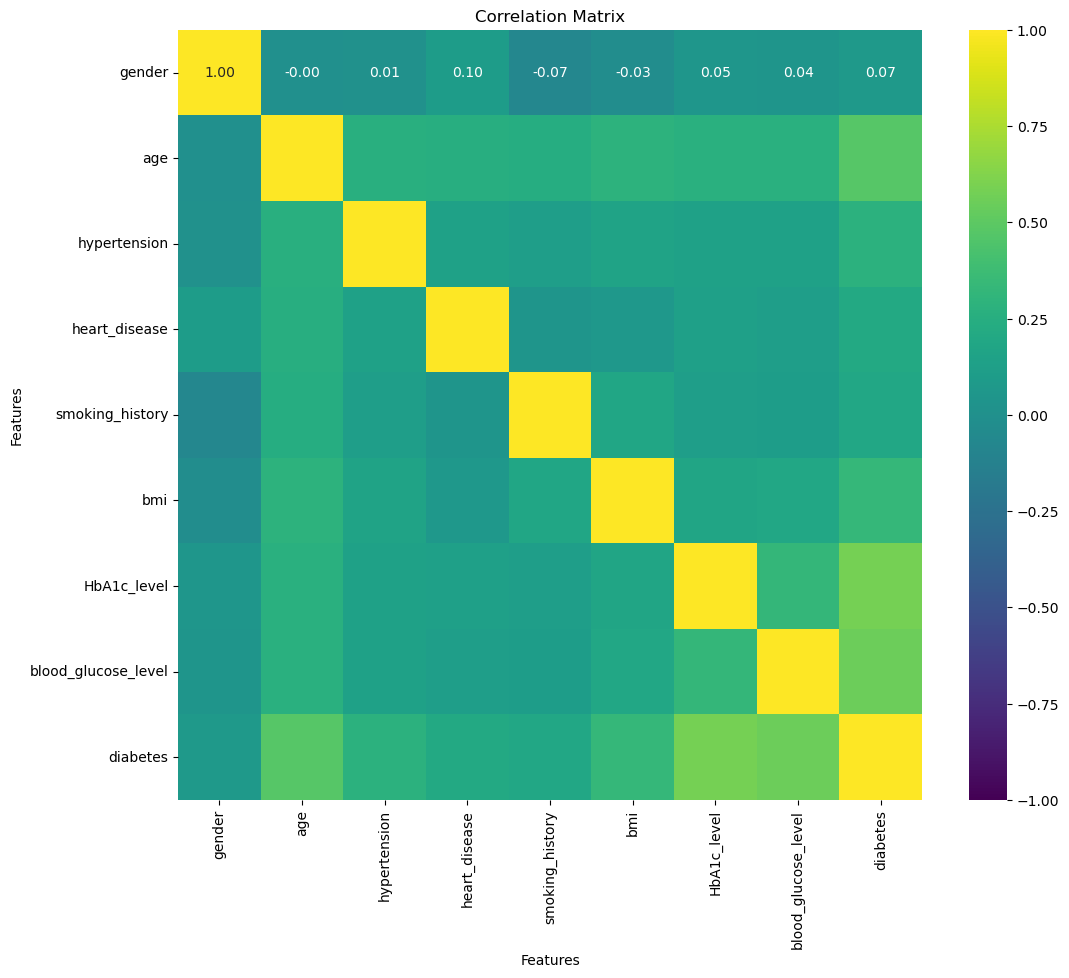

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.savefig('Correlation_Matrix.jpg')
plt.show()


In [31]:
# Checking for highly Correlated Features
# Setting a threshold for high correlation
threshold = 0.71
# Initializing a list to store highly correlated features pairs
highly_correlated_pairs = []
# Iterating through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Store the names of highly correlated features
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)
if not highly_correlated_pairs:
    print("No highly correlated features found.")
else:
    print("Highly correlated feature pairs:")
    for pair in highly_correlated_pairs:
        print(pair)

No highly correlated features found.


In [32]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


# Data Splitting For Machine Learning

In [33]:

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)


# Separate Feature and Target Variables

In [34]:
X = df[['age','gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
Y = df['diabetes']  # Target variable is 'diabetes'

In [35]:
X.head()

,age,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
6003,28.0,1,0,0,4,28.64,4.8,130
4885,44.0,1,0,0,4,27.32,3.5,160
2955,78.0,1,0,0,3,32.45,5.7,260
2303,58.0,1,0,0,3,34.53,6.8,155
496,68.0,0,1,0,4,45.23,7.5,240


In [36]:
Y

6003    0
4885    0
2955    1
2303    1
496     1
       ..
3773    0
5196    0
5231    0
5395    0
860     1
Name: diabetes, Length: 6764, dtype: int64

# Data Splitting

In [37]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


# Checking the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (5411, 8)
Shape of X_test: (1353, 8)
Shape of Y_train: (5411,)
Shape of Y_test: (1353,)


In [38]:
X_train.head()

,age,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
2145,48.0,1,0,0,0,37.69,8.2,200
3702,66.0,0,0,0,0,27.32,6.6,160
6154,26.0,0,0,0,4,19.28,6.2,80
6379,38.0,0,0,0,0,27.32,4.5,145
2090,61.0,1,0,1,3,36.64,5.7,240


In [39]:
gender_counts = X_train['gender'].value_counts()

print("gender Counts in X_train:")
print(gender_counts)

gender Counts in X_train:
gender
0    3081
1    2330
Name: count, dtype: int64


# Normalization

In [40]:

scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
# Convert the scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Display the first few rows of the scaled training data to see how the features were normalized
print("Scaled Training Data:")
print(X_train.head())

# Display the first few rows of the scaled testing data to see how the features were normalized
print("\nScaled Testing Data:")
print(X_test.head())

Scaled Training Data:
        age  gender  hypertension  heart_disease  smoking_history       bmi  \
0  0.599600     1.0           0.0            0.0              0.0  0.343404   
1  0.824825     0.0           0.0            0.0              0.0  0.210080   
2  0.324324     0.0           0.0            0.0              0.8  0.106711   
3  0.474474     0.0           0.0            0.0              0.0  0.210080   
4  0.762262     1.0           0.0            1.0              0.6  0.329905   

   HbA1c_level  blood_glucose_level  
0     0.854545             0.545455  
1     0.563636             0.363636  
2     0.490909             0.000000  
3     0.181818             0.295455  
4     0.400000             0.727273  

Scaled Testing Data:
        age  gender  hypertension  heart_disease  smoking_history       bmi  \
0  1.000000     0.0           0.0            0.0              0.8  0.210080   
1  0.724725     1.0           0.0            0.0              0.2  0.280921   
2  0.987487     

In [42]:
X_train.head()

,age,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.599600,1.0,0.0,0.0,0.0,0.343404,0.854545,0.545455
1,0.824825,0.0,0.0,0.0,0.0,0.210080,0.563636,0.363636
2,0.324324,0.0,0.0,0.0,0.8,0.106711,0.490909,0.000000
3,0.474474,0.0,0.0,0.0,0.0,0.210080,0.181818,0.295455
4,0.762262,1.0,0.0,1.0,0.6,0.329905,0.400000,0.727273


# Target Variable Distribution

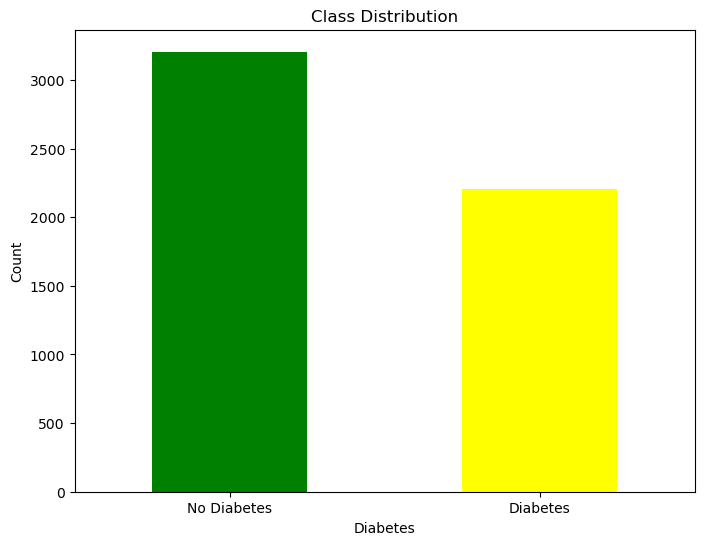

In [43]:
# Count the occurrences of each class
class_counts = Y_train.value_counts()

# Reorder the class counts so that Churned (0) is displayed before Stayed (1)
class_counts_reordered = class_counts.reindex([0, 1])

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts_reordered.plot(kind='bar', color=['green', 'yellow'])  # Using green and yellow colors
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)  # Set x-axis ticks to display class labels
plt.show()



# Machine Learning Algorithm

In [44]:
# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
Y_pred_rf_train = rf_model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, Y_pred_rf_train))
print ("Precision on training data: ", metrics.precision_score(Y_train, Y_pred_rf_train)) 
print ("Recall on training data: ", metrics.recall_score(Y_train, Y_pred_rf_train))

Accuracy on training data:  0.9994455738310848
Precision on training data:  0.998641304347826
Recall on training data:  1.0


In [46]:
Y_pred_rf = rf_model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, Y_pred_rf))
print ("Precision on testing data: ", metrics.precision_score(Y_test, Y_pred_rf)) 
print ("Recall on testing data: ", metrics.recall_score(Y_test, Y_pred_rf))

Accuracy on testing data:  0.9150036954915004
Precision on testing data:  0.9052044609665427
Recall on testing data:  0.8838475499092558


TN=751, FP=51, FN=64, TP=487


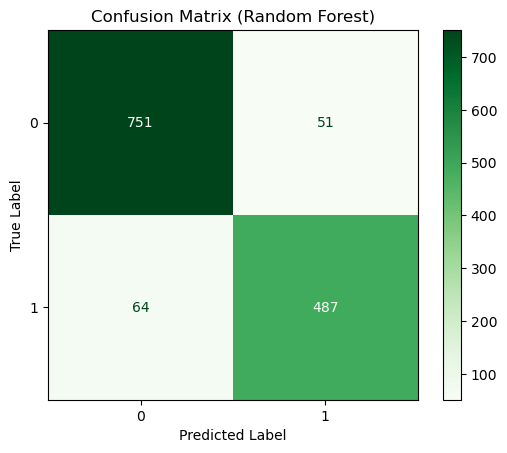

In [47]:
#Display the confusion matrix for your model
cm_RF= metrics.confusion_matrix(Y_test,Y_pred_rf)
TN, FP, FN, TP = cm_RF.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN,FP,FN,TP))
disp_RF = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp_RF.plot(cmap='Greens')  
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("Confusion Matrix.jpg")
plt.show()

In [48]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.9150036954915004
Calculated precision =  0.9052044609665427
Calculated recall =  0.8838475499092558


In [49]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(Y_test,Y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       802
           1       0.91      0.88      0.89       551

    accuracy                           0.92      1353
   macro avg       0.91      0.91      0.91      1353
weighted avg       0.91      0.92      0.91      1353



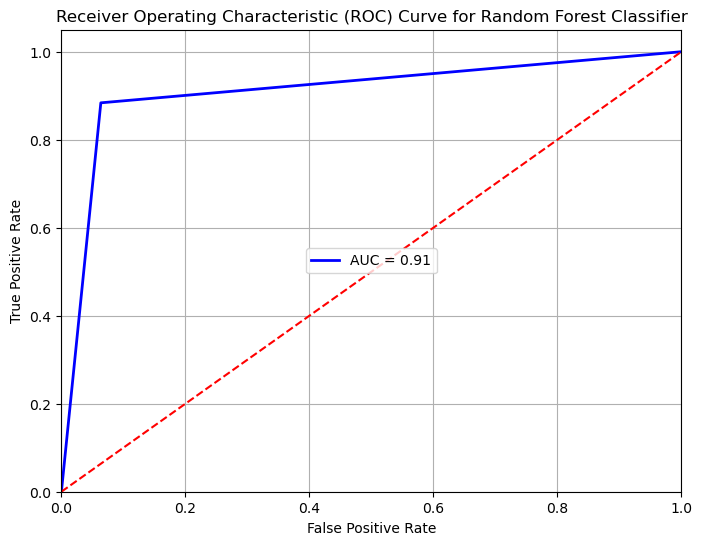

In [50]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_rf)
# Calculate the AUC score
auc_score = roc_auc_score(Y_test, Y_pred_rf)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='center')
plt.grid(True)
plt.savefig('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier.jpg')
plt.show()

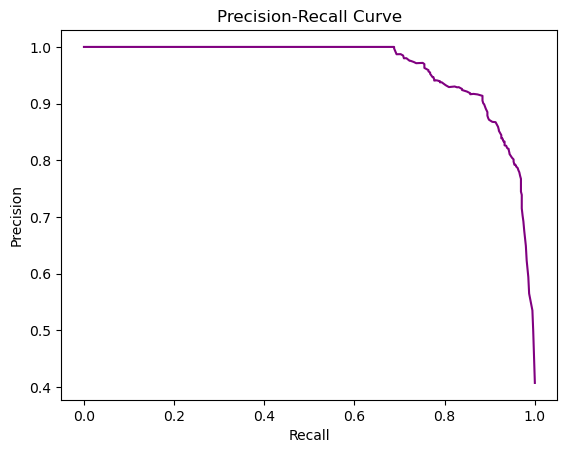

In [51]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(Y_test, rf_model.predict_proba(X_test)[:, 1])

# Create Precision Recall Curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

# Display plot
plt.savefig('Precision-Recall Curve(Random Forest Classifier).jpg')
plt.show()

# Bias and Fairness

In [52]:
# Check the column names of the features in X_train
column_names = list(X_train.columns)

# Print the column names
print(column_names)

['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [53]:
X_train_gender = X_train.drop(columns= ['gender'])
X_test_gender = X_test.drop(columns= ['gender'])  

In [54]:
# Train a Random Forest model
rf_model_gender = RandomForestClassifier()
rf_model_gender.fit(X_train_gender, Y_train)

RandomForestClassifier()

# Predicting Model on Train and Test set

In [55]:
Y_pred_rf_train_gender = rf_model_gender.predict(X_train_gender)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, Y_pred_rf_train_gender))
print ("Precision on training data: ", metrics.precision_score(Y_train, Y_pred_rf_train_gender)) 
print ("Recall on training data: ", metrics.recall_score(Y_train, Y_pred_rf_train_gender))

Accuracy on training data:  0.9987063389391979
Precision on training data:  0.9981867633726201
Recall on training data:  0.998639455782313


In [56]:
Y_pred_rf_gender = rf_model_gender.predict(X_test_gender)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, Y_pred_rf_gender))
print ("Precision on testing data: ", metrics.precision_score(Y_test, Y_pred_rf_gender)) 
print ("Recall on testing data: ", metrics.recall_score(Y_test, Y_pred_rf_gender))

Accuracy on testing data:  0.909830007390983
Precision on testing data:  0.8979591836734694
Recall on testing data:  0.8784029038112523


In [57]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(Y_test,Y_pred_rf_gender))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       802
           1       0.90      0.88      0.89       551

    accuracy                           0.91      1353
   macro avg       0.91      0.90      0.91      1353
weighted avg       0.91      0.91      0.91      1353



# Splitting into Protected Groups

In [58]:
PROTECTED  =  "gender" 
MEN =  1.0 #male 
WOMEN = 0.0 #women
gender_dist = X_test[PROTECTED].value_counts()
print(gender_dist)
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

gender
0.0    763
1.0    590
Name: count, dtype: int64
[   1    4   11   12   16   17   19   20   25   26   33   36   37   38
   42   43   48   51   52   53   56   57   60   61   63   64   66   67
   70   73   74   77   78   81   82   83   93   94   96   99  101  108
  111  112  113  115  118  121  122  124  125  126  127  128  130  132
  136  137  138  139  141  145  146  147  148  150  151  152  156  157
  158  162  166  169  171  172  175  177  178  179  180  186  189  191
  194  195  196  197  198  200  201  203  206  207  208  210  214  215
  218  219  222  230  231  232  235  236  237  242  243  248  249  250
  251  253  255  259  260  261  264  265  267  269  270  271  274  277
  280  281  282  283  285  287  291  292  298  299  300  302  303  304
  306  309  310  311  313  315  318  319  321  323  329  331  332  333
  339  341  343  344  349  350  354  355  359  360  363  369  371  373
  374  375  377  386  392  396  399  400  402  403  407  410  412  418
  419  421  422  423  

# Test Split By Gender

In [59]:
Y_test_m = [Y_test.values[i] for i in men_indices]
Y_test_f = [Y_test.values[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)

[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 

In [60]:
Y_predict_m = [Y_pred_rf[i] for i in men_indices]
Y_predict_f = [Y_pred_rf[i] for i in women_indices]
print(Y_predict_m)
print()
print(Y_predict_f)

[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 

# Models On Males

TN_m=303, FP_m=19, FN_m=29, TP_m=239


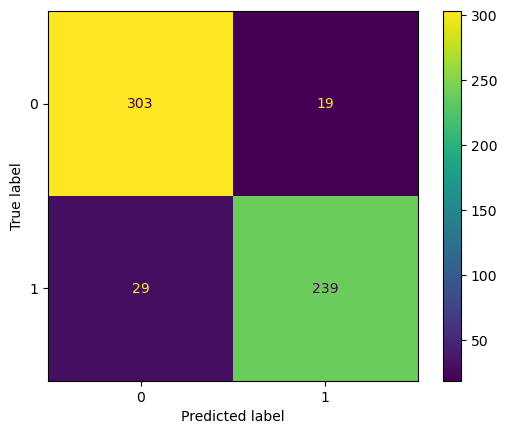

In [61]:
cm_males = metrics.confusion_matrix(Y_test_m, Y_predict_m)
TN_m, FP_m, FN_m, TP_m = cm_males.ravel()
print("TN_m={0}, FP_m={1}, FN_m={2}, TP_m={3}".format(TN_m,FP_m,FN_m,TP_m))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm_males)
disp.plot()
plt.show()

In [62]:
accuracy = (TP_m+TN_m)/(TN_m+FP_m+FN_m+TP_m)
recall = (TP_m)/(FN_m+TP_m)
precision = (TP_m)/(TP_m+FP_m)
print("Calculated Accuracy = ", accuracy)
print("Calculated Recall = ", recall)
print("Calculated Precision = ", precision)

Calculated Accuracy =  0.9186440677966101
Calculated Recall =  0.8917910447761194
Calculated Precision =  0.9263565891472868


In [63]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(Y_test_m, Y_predict_m))
print("Positive Rate", (TP_m+FP_m)/(TP_m+FP_m+TN_m+FN_m))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       322
           1       0.93      0.89      0.91       268

    accuracy                           0.92       590
   macro avg       0.92      0.92      0.92       590
weighted avg       0.92      0.92      0.92       590

Positive Rate 0.43728813559322033


# Models on Females

TN_f=448, FP_f=32, FN_f=35, TP_f=248


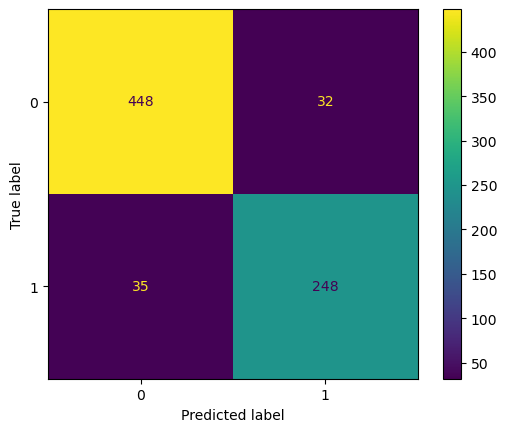

In [64]:
cm_females = metrics.confusion_matrix(Y_test_f, Y_predict_f)
TN_f, FP_f, FN_f, TP_f = cm_females.ravel()
print("TN_f={0}, FP_f={1}, FN_f={2}, TP_f={3}".format(TN_f,FP_f,FN_f,TP_f))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm_females)
disp.plot()
plt.show()

In [65]:
accuracy = (TP_f+TN_f)/(TN_f+FP_f+FN_f+TP_f)
recall = (TP_f)/(FN_f+TP_f)
precision = (TP_f)/(TP_f+FP_f)
print("Calculated Accuracy = ", accuracy)
print("Calculated Recall = ", recall)
print("Calculated Precision = ", precision)

Calculated Accuracy =  0.9121887287024901
Calculated Recall =  0.8763250883392226
Calculated Precision =  0.8857142857142857


In [66]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(Y_test_f, Y_predict_f))
print("Positive Rate", (TP_f+FP_f)/(TP_f+FP_f+TN_f+FN_f))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       480
           1       0.89      0.88      0.88       283

    accuracy                           0.91       763
   macro avg       0.91      0.90      0.91       763
weighted avg       0.91      0.91      0.91       763

Positive Rate 0.3669724770642202


# Application Of Fairness Criteria(Equal Accuracy, Demographic Parity, and Equal Opportunity.

# Calculation of Equal Accuracy for Male and Female

In [67]:
# Assigning values for males
TN_m = 297
FP_m = 25
FN_m = 29
TP_m = 239

# Assigned values for females
TN_f = 446
FP_f = 34
FN_f = 37
TP_f = 246

# Calculate equal accuracy for males
total_predictions_m = TN_m + FP_m + FN_m + TP_m
equal_accuracy_m = (TP_m + TN_m) / total_predictions_m

# Calculate equal accuracy for females
total_predictions_f = TN_f + FP_f + FN_f + TP_f
equal_accuracy_f = (TP_f + TN_f) / total_predictions_f

# Output the results
print("Equal Accuracy for Men:", equal_accuracy_m)
print("Equal Accuracy for Women:", equal_accuracy_f)


Equal Accuracy for Men: 0.9084745762711864
Equal Accuracy for Women: 0.9069462647444299


# Calculate and Compare the demographic parity between Male and Female

In [68]:
# values for males
TP_m = 239  # True Positives for males
FP_m = 25   # False Positives for males

#  values for females
TP_f = 246  # True Positives for females
FP_f = 34   # False Positives for females

# Calculate demographic parity for males and females
demographic_parity_m = TP_m / (TP_m + FP_m)
demographic_parity_f = TP_f / (TP_f + FP_f)

print("Demographic Parity for Men:", demographic_parity_m)
print("Demographic Parity for Women:", demographic_parity_f)

Demographic Parity for Men: 0.9053030303030303
Demographic Parity for Women: 0.8785714285714286


# Calculate and Compare for Equal opportunity in Both male and female

In [69]:

# Recall for Men (True Positive Rate)
recall_m = TP_m / (TP_m + FN_m)

# Recall for Women (True Positive Rate)
recall_f = TP_f / (TP_f + FN_f)

# Calculate recall (equal opportunity) for men and women
recall_positive_m = recall_m
recall_positive_f = recall_f
print("Recall (Equal Opportunity) for Men:", recall_positive_m)
print("Recall (Equal Opportunity) for Women:", recall_positive_f)

Recall (Equal Opportunity) for Men: 0.8917910447761194
Recall (Equal Opportunity) for Women: 0.8692579505300353
